100%|██████████| 1.20M/1.20M [00:00<00:00, 34.7MB/s]

Extracting files...


Dataset shape: (6840, 29)
Sample data:
        Country Country Code  Year  Self-harm  Interpersonal violence  \
0  Afghanistan          AFG  1990        482                    1126   
1  Afghanistan          AFG  1991        535                    1510   
2  Afghanistan          AFG  1992        634                    1782   
3  Afghanistan          AFG  1993        716                    2038   
4  Afghanistan          AFG  1994        759                    2260   

   Drowning  Malaria  Fire, heat, and hot substances  Neoplasms  \
0       234       46                              86       2078   
1       262       94                              94       2183   
2       311      125                             109       2386   
3       350       58                             121       2545   
4       365      110                             126       2615   

   Digestive diseases  ...  Protein-energy malnutrition  \
0                 731  ...                          131   
1     

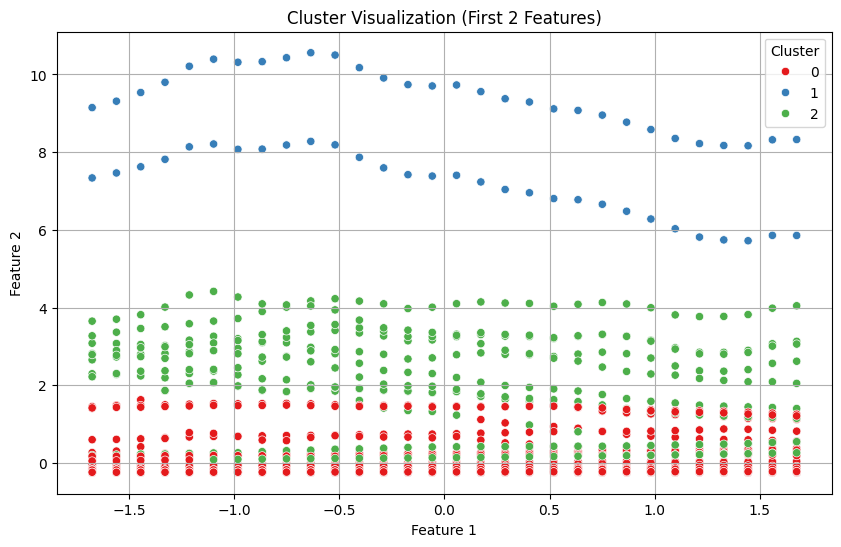

In [1]:
# STEP 1: Install Required Libraries (Run this only once in Google Colab or Jupyter)
# !pip install kagglehub pandas scikit-learn seaborn matplotlib

# STEP 2: Import Libraries
import kagglehub
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

# STEP 3: Download and Load Dataset
dataset_path = kagglehub.dataset_download("saleh846/causes-of-deaths-worldwide")
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))

# STEP 4: Explore the Data
print("Dataset shape:", df.shape)
print("Sample data:\n", df.head())

# STEP 5: Data Cleaning & Preprocessing
# Select numeric columns (causes of death data)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill missing values with column mean

# STEP 6: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# STEP 7: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# STEP 8: Analyze Cluster Characteristics
cluster_means = df.groupby('Cluster')[numeric_cols].mean()
print("\nAverage values per cluster:\n", cluster_means)

# STEP 9: Visualize Clusters (using first 2 features as sample)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['Cluster'], palette='Set1')
plt.title("Cluster Visualization (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
